# Lab Demo: Overview

This tutorials demonstrate about how to conduct machine learning experiment using decision tree.  

Folder organization is the following.

Topics include  
- Data Preparation  
- Modeling  
- Evaluation  
- Export Model

Module used in this tutorials are  
- matplotlib 3.5.1  
- numpy 1.22.3  
- pandas 1.4.3   
- scikit-learn 1.0.2  
- scipy 1.7.3 
- tqdm 4.64.0  


# Experiment

## Data Preparation

This subsection demonstrates how to prepare data for `decision tree` to train with `train test validate`.  
Details consist of 
- Import Modules and Data  
- Missing Value Handling  
- Data Transformation  
- Data Splitting

### Import Modules and Data

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

mpl.rcParams['text.color'] = 'ghostwhite'
mpl.rcParams['xtick.color'] = 'ghostwhite'
mpl.rcParams['ytick.color'] = 'ghostwhite'
mpl.rcParams['axes.labelcolor'] = 'ghostwhite'

In [4]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs",
                "restecg", "thalach", "exang", "oldpeak", "slope",
                "ca", "thal", "num"]
df = pd.read_csv("../data/processed.cleveland.data", header=None, names=column_names)

Explore the dataset using `.head()`

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Missing Value Handling  
We can do a simple data exploration with `.groupby()` as follows.

In [7]:
df.groupby("thal").size().reset_index(name="#")

,thal,#
0,3.0,166
1,6.0,18
2,7.0,117
3,?,2


In [8]:
df.groupby("ca").size().reset_index(name="#")

,ca,#
0,0.0,176
1,1.0,65
2,2.0,38
3,3.0,20
4,?,4


Obviously, missing values were reported by ? for 2 rows in `thal` and 4 rows in `ca`.  
**Remark**  Since this is a well-known dataset for teaching.  We know exactly where are missing values.  In practice, students need to explore all variables.

There is alternative to check missing values using `.info()`.  However, it works only with any missing value represented by `NaN`.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Clearly, `.info()` reports no mussing value because the missing values in this data were represented by `?`

Therefore, these rows will be excluded dataframe slicing.  

In [10]:
df = df[df["thal"] != "?"].reset_index(drop=True)
df = df[df["ca"] != "?"].reset_index(drop=True)

### Data Transformation

Although `decision tree` can handle both numerical and categorical data by theory, `sklearn` implementation requires to encode as numerical data.

`Onehot encoding` may help to solve the problem.

However, from theoretical point of views, changing categorical variable to numerical variable directly won't effect to the way decision tree work.

Because decision tree just keep counting unique values.  Let's check data type first with `.dtypes`

In [11]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

We only need to cast data type of `thal` and `ca`

In [12]:
df["thal"] = df["thal"].astype(float)
df["ca"] = df["ca"].astype(float)

Label preparation is required according to the data descriptions.

In [13]:
df["label"] = df['num'].apply(lambda x: 0 if x == 0 else 1)
df.drop("num", axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Finally, we prepare `X` and `y` for our dataset.

In [14]:
X = df.drop("label", axis=1).values
y = df["label"].values.reshape(-1, 1)

### Data Splitting

In [15]:
seed = 433 # Set random seed

train, remain = train_test_split(df, test_size=int(np.floor(0.30 * len(df.index))), 
                                stratify=df["label"], random_state=seed)

test, val = train_test_split(remain, test_size=int(np.floor(0.5 * len(remain.index))), 
                             stratify=remain["label"], random_state=seed)

print("Number of training samples is {}".format(len(train.index)))
print("Number of test samples is {}".format(len(test.index)))
print("Number of validate samples is {}".format(len(val.index)))

Number of training samples is 208
Number of test samples is 45
Number of validate samples is 44


Exploring class distribution

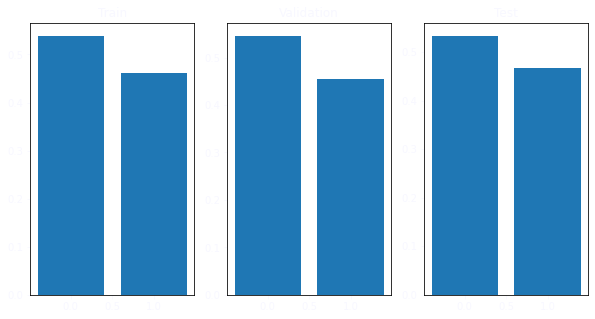

In [101]:
train_dist = train.groupby("label").size().reset_index(name="#")
train_dist["%"] = train_dist["#"] / train_dist["#"].sum()

val_dist = val.groupby("label").size().reset_index(name="#")
val_dist["%"] = val_dist["#"] / val_dist["#"].sum()

test_dist = test.groupby("label").size().reset_index(name="#")
test_dist["%"] = test_dist["#"] / test_dist["#"].sum()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
ax[0].bar(train_dist["label"], train_dist["%"])
ax[0].set_title("Train")
ax[1].bar(val_dist["label"], val_dist["%"])
ax[1].set_title("Validation")
ax[2].bar(test_dist["label"], test_dist["%"])
ax[2].set_title("Test")
plt.show()

## Modling

The modeling task attempts to search for the `optimum hyperparameters`.  

Common practices are `Random Search` and `Grid Search`.  

This subsection consists of the following tasks.  
- Import Modules  
- Hyperparameter Tuning (Random Search)  
- Hyperparameter Tuning (Grid Search)

### Random Search

There are several hyperparameters to be adjusted for decision tree in sklearn

This tutorial demonstrates only 2 hyperparameters  
- max_depth: Range from 1 to 5  
- min_sample_split: Range from 5 to 20  

**Discussions**

How do these hyperparameters effect to the tree induction?

Initialize a decision tree classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=seed,
                            class_weight="balanced")

Initialize random search cv

In [17]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(seed)
rand_depth = np.random.randint(low=1, high=5, size=10)
np.random.seed(seed)
rand_sample_split = np.random.randint(low=5, high=20, size=10)
rd_hparams = {"max_depth": rand_depth, "min_samples_split": rand_sample_split}

rand_tune = RandomizedSearchCV(dt, 
                               rd_hparams, 
                               random_state=seed, 
                               cv=[(train.index, val.index)], 
                               scoring="recall")

rand_search = rand_tune.fit(X, y)

The best set of hyperparameters can be observed via attribute `best_estimator_`

In [104]:
rand_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=12, random_state=433)

### Grid Search

Grid search will be performed on top of the best hyperparameters obtained from random search.

Initialize grid search

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
span_depth = 1
span_sample = 4
grid_depth = [rand_search.best_estimator_.max_depth + i for i in range(-span_depth, span_depth + 1)]
grid_sample = [rand_search.best_estimator_.min_samples_split + i for i in range(-span_sample, span_sample + 1)]
gd_hparams = {"max_depth": grid_depth, "min_samples_split": grid_sample}

In [25]:
grid_tune = GridSearchCV(dt, gd_hparams, cv=[(train.index, val.index)], scoring="recall")
grid_search = grid_tune.fit(X, y)

Explore the best fine tune hyperparameters

In [29]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=8, random_state=433)

## Evaluation

This section demonstrates how to evaluate the fine-tuned model.

The topics include  
- Prediction  
- Threshold Calibration  
- Performance metric calculation  
- ROC and PR plot

Prediction probability can be performed via `predict_proba`

In [35]:
prob_test = grid_search.best_estimator_.predict_proba(X[test.index])

### Threshold Calibration

By default, inferencing in sklearn to $\hat{y}$ can be performed via `predict` with fixed threshold at 0.5

However, using the 0.5 threshold is not always recommended.  Calibrating the threshold will be more reliable.

In [36]:
from sklearn.metrics import roc_curve

prob_trian = grid_search.best_estimator_.predict_proba(X[train.index])
fpr, tpr, thresholds = roc_curve(y_true=y[train.index], y_score=prob_trian[:, 1], pos_label=1)
idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[idx]
print("The optimal threshold is {}".format(optimal_threshold))

The optimal threshold is 0.6549118387909321


The optimal threshold will be used as the cutoff for prediction

In [37]:
yhat = (prob_test[:, 1] >= optimal_threshold).astype(int)

## Performance Metric Calculation

In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [39]:
cmat = confusion_matrix(y[test.index], yhat)
print(cmat)

[[19  5]
 [ 3 18]]


Confusion matrix from `scikit-learn` has different orientation from textbook.  

Such orientation was organized from python indexing that starts from 0.

The orientation of confusion matrix is organized as follows
- `TP`: cmat[1, 1]  
- `TN`: cmat[0, 0]  
- `FP`: cmat[0, 1]  
- `FN`: cmat[1, 0]  
  
We can take those values to calculate `precision`, `recall`, `accuracy` and `F1`.

In [123]:
print("Precision is {}".format(round(cmat[1, 1] / (cmat[1, 1] + cmat[0, 1]), 3)))
print("Recall is {}".format(round(cmat[1, 1] / (cmat[1, 1] + cmat[1, 0]), 3)))
print("Accuracy is {}".format(round((cmat[1, 1] + cmat[0, 0]) / cmat.sum(), 3)))
P = cmat[1, 1] / (cmat[1, 1] + cmat[0, 1])
R = cmat[1, 1] / (cmat[1, 1] + cmat[1, 0])
print("F1 is {}".format(round(2 * P * R / (P + R), 3)))

Precision is 0.783
Recall is 0.857
Accuracy is 0.822
F1 is 0.818


Alternatively, we can use the built-in function in sklearn

In [41]:
precision = precision_score(y[test.index], yhat)
recall = recall_score(y[test.index], yhat)
accuracy = accuracy_score(y[test.index], yhat)
f1 = f1_score(y[test.index], yhat)

print("Precision is {}".format(round(precision, 3)))
print("Recall is {}".format(round(recall, 3)))
print("Accuracy is {}".format(round(accuracy, 3)))
print("F1 is {}".format(round(f1, 3)))

Precision is 0.783
Recall is 0.857
Accuracy is 0.822
F1 is 0.818


### ROC Curve and PR Plot

Behavior of the model can be observed via ROC curve and PR curve

In [42]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

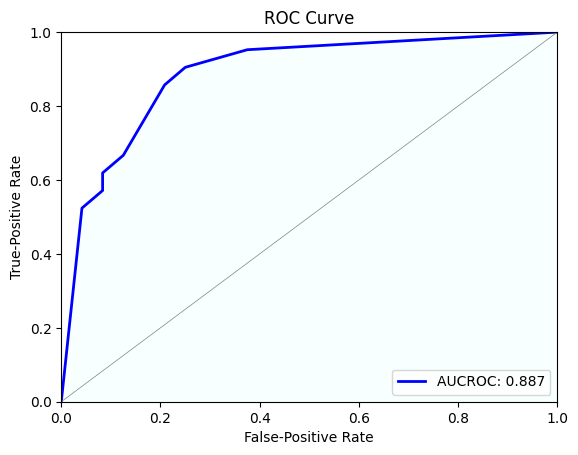

In [43]:
aucroc = roc_auc_score(y_true=y[test.index], y_score=prob_test[:, 1])
fpr, tpr, thresholds = roc_curve(y_true=y[test.index], y_score=prob_test[:, 1], pos_label=1)

plt.style.use("default")
plt.plot(fpr, tpr, color="blue", linewidth=2, label="AUCROC: {}".format(round(aucroc, 3)))
plt.plot([0, 1], [0, 1], color="gray", linewidth=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("False-Positive Rate")
plt.ylabel("True-Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.fill_between(fpr, tpr, color="azure", alpha=0.5)
plt.savefig("../images/roc_dt.svg", format="svg")

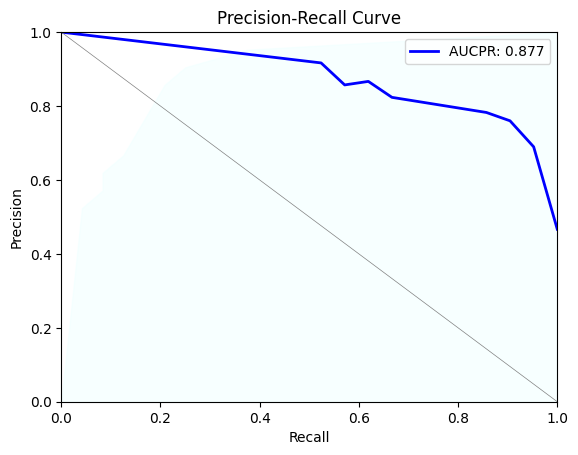

In [44]:
p, r, t = precision_recall_curve(y_true=y[test.index], probas_pred=prob_test[:, 1], pos_label=1)
aucpr = auc(r, p)
plt.style.use("default")
plt.plot(r, p, color="blue", linewidth=2, label="AUCPR: {}".format(round(aucpr, 3)))
plt.plot([1, 0], [0, 1], color="gray", linewidth=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.fill_between(fpr, tpr, color="azure", alpha=0.5)
plt.savefig("../images/pr_dt.svg", format="svg")

# Analysis of Errors

This section demonstrates how to make a good discussions from experiment.

The topics include  
- Model Visualization  
- Analyzing misclassified samples

## Model Visualization

Model visualization depends on the type of models.

The decision tree can be visualized as a tree

[Text(0.5, 0.875, 'thal <= 4.5\ngini = 0.5\nsamples = 297\nvalue = [148.5, 148.5]\nclass = y[1]'),
 Text(0.25, 0.625, 'ca <= 0.5\ngini = 0.379\nsamples = 164\nvalue = [117.872, 40.106]\nclass = y[0]'),
 Text(0.125, 0.375, 'trestbps <= 157.0\ngini = 0.226\nsamples = 115\nvalue = [94.669, 14.091]\nclass = y[0]'),
 Text(0.0625, 0.125, 'gini = 0.172\nsamples = 109\nvalue = [92.812, 9.755]\nclass = y[0]'),
 Text(0.1875, 0.125, 'gini = 0.42\nsamples = 6\nvalue = [1.856, 4.336]\nclass = y[1]'),
 Text(0.375, 0.375, 'cp <= 3.5\ngini = 0.498\nsamples = 49\nvalue = [23.203, 26.015]\nclass = y[1]'),
 Text(0.3125, 0.125, 'gini = 0.395\nsamples = 29\nvalue = [20.419, 7.588]\nclass = y[0]'),
 Text(0.4375, 0.125, 'gini = 0.228\nsamples = 20\nvalue = [2.784, 18.427]\nclass = y[1]'),
 Text(0.75, 0.625, 'cp <= 3.5\ngini = 0.344\nsamples = 133\nvalue = [30.628, 108.394]\nclass = y[1]'),
 Text(0.625, 0.375, 'ca <= 0.5\ngini = 0.499\nsamples = 44\nvalue = [21.347, 22.763]\nclass = y[1]'),
 Text(0.5625, 0.12

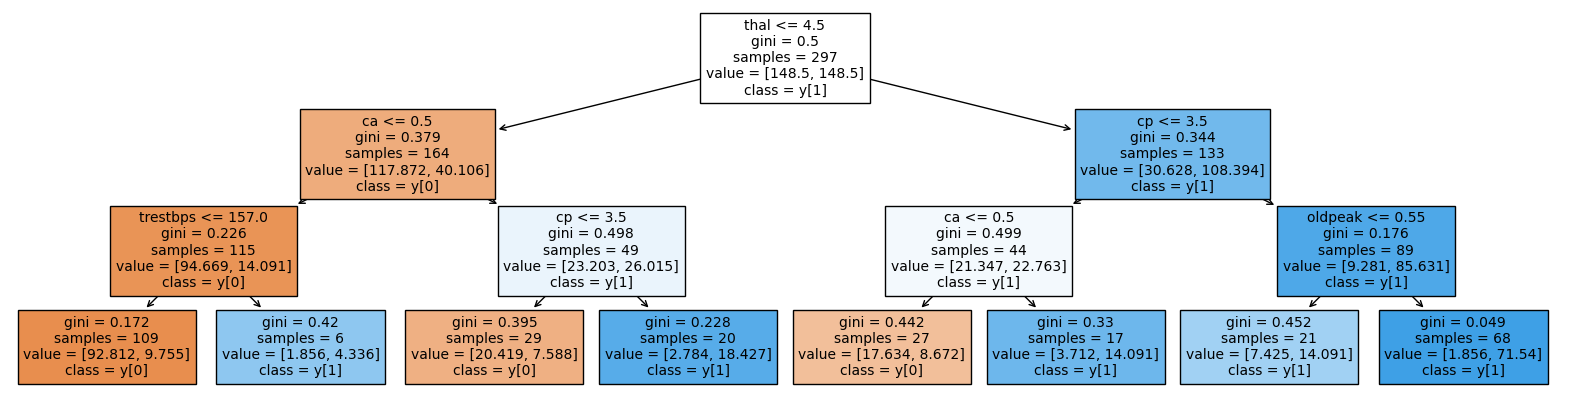

In [177]:
from sklearn import tree

plt.figure(figsize=(20,5))
tree.plot_tree(grid_search.best_estimator_, fontsize=10, feature_names=df.columns[0:-1], class_names=True, filled=True)

## Analyzing Misclassified Samples

To perform an analysis of errors, we should start from hypothesis

Findings for each hypothesis leads to insights to summarize in discussions 

**Question** What could make misclassification?

**Answer** One of possible reasons for this experiment is about coverage in training data

We hypothesize that the training data were not cover the pattern of misclassified samples

We can simple create the pattern of training data and misclassified samples using line graph

Although some features are categorical but we won't make inference from numbering representation, all we need is to see the pattern.

In [45]:
test_samples = test.copy()
test_samples["yhat"] = yhat
missclf = test_samples[test_samples["label"] != test_samples["yhat"]].reset_index()

In [150]:
missclf

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,yhat
0,10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0,1
1,75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0,1
2,240,61.0,1.0,1.0,134.0,234.0,0.0,0.0,145.0,0.0,2.6,2.0,2.0,3.0,1,0
3,247,57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0,0,1
4,289,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1,0
5,101,57.0,0.0,4.0,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0,1
6,142,64.0,1.0,3.0,125.0,309.0,0.0,0.0,131.0,1.0,1.8,2.0,0.0,7.0,1,0
7,174,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0,1


In [151]:
def error_types(label, yhat):
    if (label == 1) & (yhat == 0):
        return "fn"
    elif (label == 0) & (yhat == 1):
        return "fp"
    else:
        return "correct"

In [152]:
missclf["error"] = missclf.apply(lambda x: error_types(x["label"], x["yhat"]), axis=1)
missclf

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,yhat,error
0,10,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0,1,fp
1,75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0,1,fp
2,240,61.0,1.0,1.0,134.0,234.0,0.0,0.0,145.0,0.0,2.6,2.0,2.0,3.0,1,0,fn
3,247,57.0,1.0,4.0,110.0,201.0,0.0,0.0,126.0,1.0,1.5,2.0,0.0,6.0,0,1,fp
4,289,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1,0,fn
5,101,57.0,0.0,4.0,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0,1,fp
6,142,64.0,1.0,3.0,125.0,309.0,0.0,0.0,131.0,1.0,1.8,2.0,0.0,7.0,1,0,fn
7,174,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0,1,fp


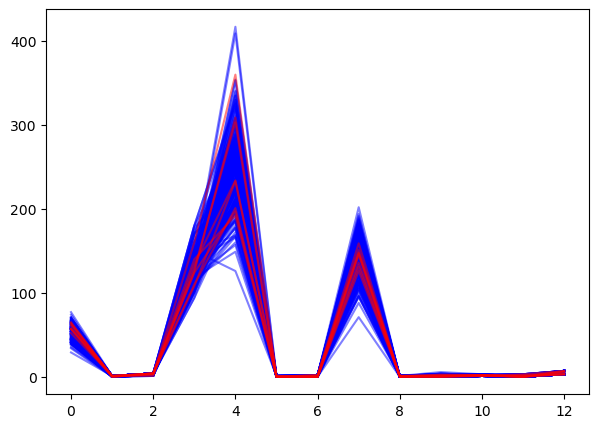

In [169]:
figure, axis = plt.subplots(figsize=(7, 5))

for i in train.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = train.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="blue")
    
for i in missclf.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = missclf.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="red")

The line plot shows pattern of training data that seems to have enough coverage for all missclassified samples.

We could dril-down to the more precise hypothesis for each class

In [172]:
fp = missclf[missclf["error"] == "fp"].reset_index(drop=True)
pos_samples = train[train["label"] == 1].reset_index()

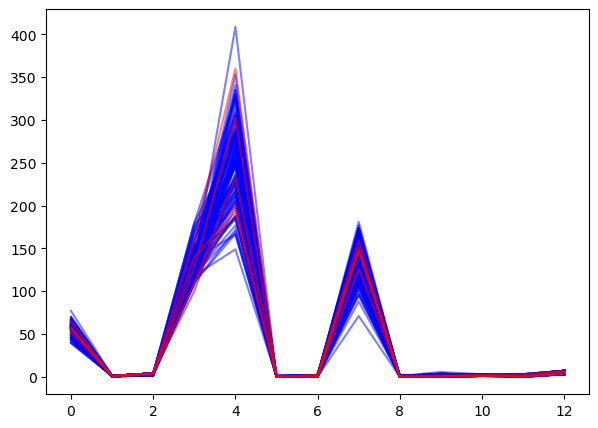

In [173]:
figure, axis = plt.subplots(figsize=(7, 5))

for i in pos_samples.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = pos_samples.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="blue")
    
for i in fp.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = fp.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="red")

In [174]:
fn = missclf[missclf["error"] == "fn"].reset_index(drop=True)
neg_samples = train[train["label"] == 0].reset_index()

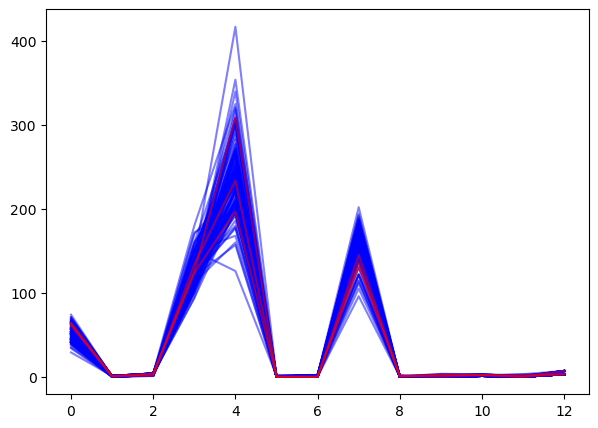

In [175]:
figure, axis = plt.subplots(figsize=(7, 5))

for i in neg_samples.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = neg_samples.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="blue")
    
for i in fn.index:
    xlabel = df.columns[0:-1]
    xval = range(len(xlabel))
    yval = fn.loc[i, xlabel]
    axis.plot(xval, yval, alpha=0.5, color="red")

Clearly, the hypothesis about not enough coverage in training samples is rejected.

We can also hypothesize about some medical knowledge that could explain why did we get these misclassified samples

We can also discuss about the mechanism of decision tree that generated such errors.  Let's talk in the class.